In [1]:
import scipy as sp
import scipy.integrate as sp_int
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
import poisson_pgf as pois_pgf

In [12]:
def derv(x,t,lam,rr,mm,pp, calc_g, calc_g1, calc_g2):
    #y[0]= change of theta 
    #y[1]= change of p_infec 
    #y[2]= change of p_suscep 
    #y[3]= proportion of S 
    #y[4]= change of M_I 
    #y[5]= change of I
    # print(t)
    pp = pp*(1 + pp * np.cos(pp/52*t + 0.1)) 
    y=list(range(6))#zeros(6);
    y[0]=-rr*x[1]*x[0] 
    y[1]=rr*x[2]*x[1]*x[0]*calc_g2(x[0], lam,)/calc_g1(x[0],lam)-rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1]) 
    y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(x[0],lam)/calc_g1(x[0],lam))+pp*(x[0]*calc_g1(x[0],lam)/calc_g1(1,lam)-x[2])
    y[3]=-rr*x[1]*x[0]*calc_g1(x[0],lam) 
    y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(x[0],lam)+x[0]*calc_g1(x[0],lam)/calc_g1(1,lam)) 
    y[5]=rr*x[1]*x[0]*calc_g1(x[0],lam)-mm*x[5]
    return(y)

In [13]:
lamda = 1.5
r = 0.2
mu = 0.2
ro = 0.2
epsilon = 0.0005
time = list(range(0,200))
# time = np.linspace(0,200,0.1)
init = [1 - epsilon, # proportion susceptible at start
       epsilon / (1 - epsilon), #
       (1 - 2*epsilon)/(1 - epsilon), #
       pois_pgf.calc_g(1 - epsilon, lamda), #
       epsilon, #
       1 - pois_pgf.calc_g(1- epsilon, lamda) # 
       ]

out=sp_int.odeint(derv, init, time, args=(lamda,r,mu,ro, 
                                          pois_pgf.calc_g,pois_pgf.calc_g1,pois_pgf.calc_g2))

In [14]:
N = 10_000
pop_tap = out * N

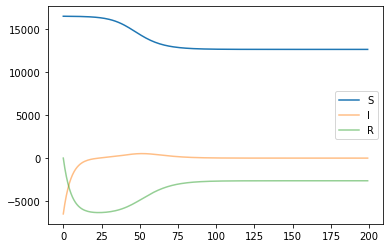

In [15]:
# plt.plot(pop_tap[:,0], alpha =0.5) # change of theta
# plt.plot(pop_tap[:,1])#
# plt.plot(pop_tap[:,2])
plt.plot(pop_tap[:,3], label = 'S')
# plt.plot(pop_tap[:,4], alpha = 0.5)
plt.plot(pop_tap[:,5], alpha = 0.5, label = 'I')
# recovered
plt.plot(N - (pop_tap[:,5]+pop_tap[:,3]), alpha = 0.5, label= 'R')
plt.legend()

In [93]:
pop_tap[:,5][0]

7.497188202992833

In [94]:
# final size
N - (pop_tap[:,5]+pop_tap[:,3])[199:]

array([3511.54247998])